In [1]:
import os
from PIL import Image
from utils import *
import torch
from diffusers import StableDiffusionPipeline

device = "cuda:0"

### Load Stable Diffusion

In [3]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    torch_dtype=torch.float16
)
print("[INFO] Successfully loaded Stable Diffusion!")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

[INFO] Successfully loaded Stable Diffusion!


### Load LoRA weights

In [4]:
# lora_path = "./runs/sd-naruto-model-lora"
# lora_path = "./runs/miku_dataset"
lora_path = "./runs/miku_dream"
# lora_path = None  # if not using LoRA

if lora_path is not None:
    pipe.load_lora_weights(lora_path)
    print("[INFO] Successfully loaded LoRA weights!")
    
pipe = pipe.to(device)

[INFO] Successfully loaded LoRA weights!


### Inference

  0%|          | 0/30 [00:00<?, ?it/s]

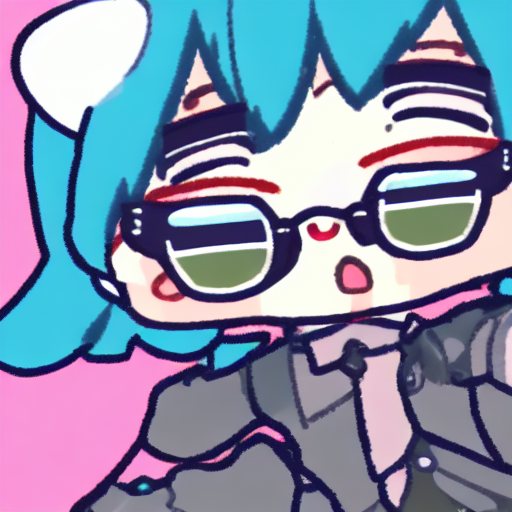

In [10]:
prompt = "a chibi anime girl with sunglasses"
pipe.safety_checker = None
seed = 393

seed_everything(seed)

image = pipe(
    prompt, 
    num_inference_steps=30, 
    guidance_scale=7.5
).images[0]

image